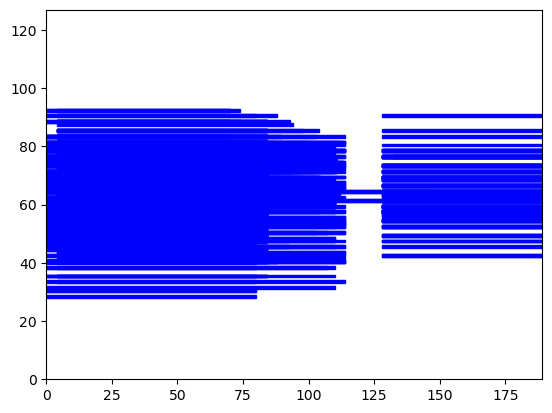

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mido import MidiFile

# Load the MIDI file
midi_file = MidiFile('datasets/Debussy_Generic/arabesq1.mid')

# Create a new figure
fig, ax = plt.subplots()

# Set the x and y limits of the plot
ax.set_xlim(0, midi_file.length)
ax.set_ylim(0, 127)

# Loop over each track in the MIDI file
for i, track in enumerate(midi_file.tracks):
    # Loop over each message in the track
    for msg in track:
        # If the message is a note on message, plot a rectangle
        if msg.type == 'note_on':
            rect = patches.Rectangle((msg.time, msg.note), msg.velocity, 1, color='blue')
            ax.add_patch(rect)

# Show the plot
plt.show()


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pretty_midi

def plot_piano_roll(pm, start_pitch, end_pitch, fs=100):
    # Calculate the piano roll dimensions
    piano_roll = pm.get_piano_roll(fs=fs)
    piano_roll = piano_roll[start_pitch:end_pitch, :]
    # Plot the piano roll
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.imshow(piano_roll.T, aspect='auto', origin='lower', cmap='gray_r')
    # Add x and y axis labels
    ax.set_xlabel('Time (seconds)')
    ax.set_ylabel('MIDI Pitch')
    # Set the yticks to the piano key frequencies
    midi_frequencies = pretty_midi.note_number_to_hz(np.arange(0, 128))
    piano_key_frequencies = midi_frequencies[12:84]  # Only show frequencies for keys on a standard piano
    midi_ticks = pretty_midi.note_number_to_midi(np.arange(start_pitch, end_pitch))
    ax.set_yticks(midi_ticks)
    ax.set_yticklabels([f'{int(frequency)} Hz' for frequency in piano_key_frequencies])
    # Set the xticks to time in seconds
    seconds_per_tick = 1 / fs
    tick_locations = np.arange(0, piano_roll.shape[1], fs)
    time_labels = [f'{tick * seconds_per_tick:.1f}' for tick in tick_locations]
    ax.set_xticks(tick_locations)
    ax.set_xticklabels(time_labels)
    plt.show()


c:\Users\triam\anaconda3\lib\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


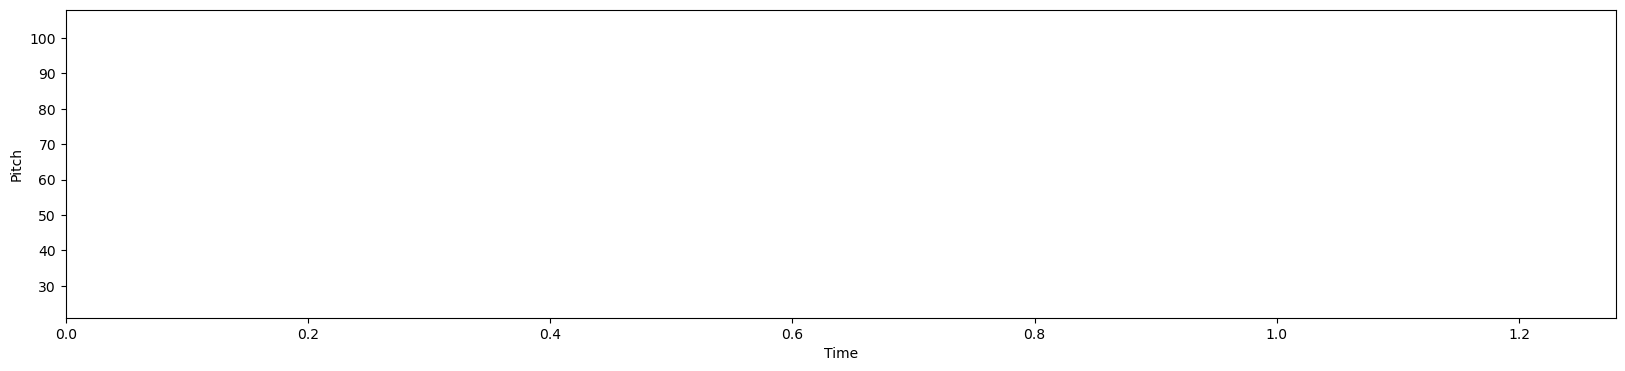

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pretty_midi

def plot_piano_roll(piano_roll, start_pitch, end_pitch, fs=100):
    # Create a new figure
    fig = plt.figure(figsize=(20, 4))

    # Add axis labels
    plt.xlabel("Time")
    plt.ylabel("Pitch")

    # Set the plot limits
    plt.xlim(0, piano_roll.shape[0] / fs)
    plt.ylim(start_pitch, end_pitch)

    # Plot the piano roll
    plt.imshow(piano_roll.T, aspect='auto', origin='lower', cmap='gray_r')

    # Show the plot
    plt.show()

# Load the MIDI file
midi_data = pretty_midi.PrettyMIDI('datasets/Debussy_Generic/arabesq1.mid')

# Get the piano roll for the MIDI file
fs = 100  # Sampling frequency in Hz
piano_roll = midi_data.get_piano_roll(fs=fs)

# Set the range of pitches to display
start_pitch = 21  # A0
end_pitch = 108  # C8

# Plot the piano roll
plot_piano_roll(piano_roll, start_pitch, end_pitch, fs=fs)


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pretty_midi

def plot_piano_roll(piano_roll, start_pitch, end_pitch, fs=10):
    # Plot the piano roll
    plt.figure(figsize=(8, 4))
    plt.imshow(piano_roll.T, aspect='auto', cmap='gray_r', origin='lower')
    plt.xlabel('Time')
    plt.ylabel('Pitch')
    plt.xticks(np.arange(0, piano_roll.shape[0], fs*4), np.arange(0, piano_roll.shape[0]//fs//4))
    plt.yticks(np.arange(0, end_pitch-start_pitch), np.arange(start_pitch, end_pitch))
    plt.show()

# Load MIDI file into PrettyMIDI object
midi_data = pretty_midi.PrettyMIDI('datasets/Debussy_Generic/arabesq1.mid')

# Filter out non-zero tracks
midi_data.tracks = [midi_data.tracks[0]]

# Get piano roll
fs = 10  # Sampling frequency in Hz
piano_roll = midi_data.get_piano_roll(fs=fs)

# Define the range of pitches to be included in the piano roll
start_pitch = 21  # A0
end_pitch = 108  # C8

# Plot the piano roll
plot_piano_roll(piano_roll[start_pitch:end_pitch], start_pitch, end_pitch, fs=fs)


AttributeError: 'PrettyMIDI' object has no attribute 'tracks'

In [ ]:
import pretty_midi
import matplotlib.pyplot as plt

def plot_piano_roll(pm, start_pitch, end_pitch, fs=10):
    # Use librosa's specshow function for displaying the piano roll
    librosa.display.specshow(pm.get_piano_roll(fs)[start_pitch:end_pitch],
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                             fmin=pretty_midi.note_number_to_hz(start_pitch))

# Load MIDI file into PrettyMIDI object
midi_data = pretty_midi.PrettyMIDI('datasets/Debussy_Generic/arabesq1.mid')

# Plot piano roll
plot_piano_roll(midi_data, 0, 127)
plt.show()
